# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [79]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [80]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

# Function for feature building and extraction on natural language data

In [81]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [82]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/maybaho/Documents/Parsons/Machine Learning/assignments/data/moviereviews_train.tsv', my_random_seed=13)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9


# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [83]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print(ols_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 4786, 'TN': 5242, 'FP': 4756, 'FN': 5216, 'Accuracy': 0.5014, 'Precision': 0.5015719974848041, 'Recall': 0.47850429914017195, 'desc': 'ols_train'}


### MODEL: SVM, linear

In [84]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train'}


### MODEL: logistic regression

In [85]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print(lgs_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}



### MODEL: Naive Bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print(nbs_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 9585, 'TN': 9832, 'FP': 166, 'FN': 417, 'Accuracy': 0.97085, 'Precision': 0.9829761050148703, 'Recall': 0.9583083383323335, 'desc': 'nbs_train'}


### MODEL: Perceptron

In [87]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}


### MODEL: Ridge Regression Classifier

In [ ]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train'}


### MODEL: Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 8296, 'TN': 7158, 'FP': 2840, 'FN': 1706, 'Accuracy': 0.7727, 'Precision': 0.7449712643678161, 'Recall': 0.8294341131773645, 'desc': 'rdf_train'}


### ROC plot to compare performance of various models and fits

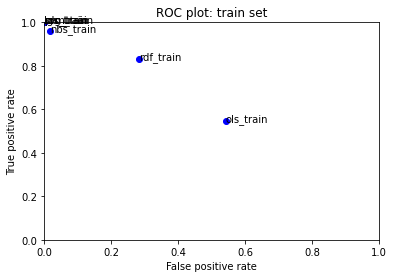

In [38]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: train set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [39]:
ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [40]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(ols_predictions)):
    if (ols_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


Examples of false positives:
4
You don't need to write a script for this trashed outrage! You just sit back and watch a pair of moonshine women and guests duke each other out before a riotous audience exposure at \The Jerry Show\"! Violent and obnoxious, this cash-in on the real Jerry Springer program reveals everything that the over-rated hyped talk show doesn't show to you on the air - - unless you have a collection of uncensored videos made by the producers of \"Cops\". Even the outside world of Springerland reveals the most amateurish acting of the decade! This goes to show you that THE GONG SHOW MOVIE had a central character in a motion picture turkey. Change the channel! REJECTED<br /><br />"
* * * * * * * * * 
86
When I saw this at a shop I thought it looked really good and original. Like Wolfs Creek meets Texas chainsaw massacre, and I mean it only cost three quid (around $6). To be honest I don't think it was even worth that.<br /><br />It seemed like the directors- the 'butch

618
Four porn stars romping through the Irish woods sounds like a film to watch. We have Ginger Lynn Allen, Chasey Lain, Taylor Hayes, and Jenna Jameson all together in one film. Are you licking your lips? Well the mutant creatures who resulted from centuries of inbreeding were certainly licking their lips as they feasted on the entrails of their victims.<br /><br />Yes, there was some flesh exposed - far too little considering the cast - but, it was soon ripped open to expose dinner for these creatures. There was definitely some action that probably has not been seen before, and more than one person lost their head in the situation.<br /><br />Unfortunately, director Christian Viel did not show much promise and I am not likely to watch his later efforts.
* * * * * * * * * 
625
Five years after the original Creepshow, another inferior horror sequel is penned by George A. Romero and Stephen King: Creepshow 2. This time there are only three stories instead of five. None of the three stor

3527
Hi folks<br /><br />Forget about that movie. John C. should be ashamed that he appears as executive producer in the credits. bon jovi has never been and will never be an actor and the FX are a joke.<br /><br />The first vampires was good ... and it was the only vampires. This thing here just wears the same name.<br /><br />Just a waste of time thinks ...<br /><br />JAKE Scorpio
* * * * * * * * * 
3595
It's impossible for me to objectively consider this movie. Not that I haven't tried, mind you - but I sit down, and I pop in the aged VHS, and I watch the opening...and suddenly I'm five years old again and clutching my very own Care Bear and watching the movie with open eyes and an eager heart.<br /><br />I can see, objectively, that this movie is a BIZARRE combination of cuddly baby merchandising-mascots and creepy prepubescent children with evil powers that has a thin story and uninteresting animation. But my inner five-year-old goes, \Yay! Care Bears!\" every time I think about i

6893
Cheezy action movie starring Dolph Lungren. Lungren is a one time military man who has retreated into a teaching job. But the changes in the neighborhood and the student body have left him frustrated and he decides that he?s going to hang it up. Things get dicey when while watching over a bunch of students in detention some robbers take over the school as a base of operation for an armored car robbery. Its Dolph versus the baddies in a fight to the death. Jaw dropping throw back to the exploitation films of the late grindhouse era where bad guys dressed as punks and some of the bad women had day glow hair. What a stupid movie. Watchable in a I can?t believe people made this sort of way, this is an action film that was probably doomed from the get go before the low budget, fake breakaway sets and poor action direction were even a twinkle in a producers eye. Watch how late in the film as cars drive through the school (don?t ask) they crash into the security turret (don?t ask since i

10028
Throw this lame dog a bone. Sooo bad...you may watch anyway. Kol(Ross Hagen)is an intergalactic bad guy that escapes being vaporised by an over zealous spaceship commander(Jan-Michael Vincent). Kol manages to steal a shuttle that crash lands on Earth. An unstoppable android killer is sent to bring back the villain dead or alive. John Phillip Law plays a forest/park ranger that urges caution in dealing with these two visitors from far, far away. Costumes are outrageous and the script is lacking intelligence. Vincent surely took the money and ran. Law shows the only sign of effort.So bad it is almost comical. Also in the cast: Dyana Ortelli, P.J. Soles and Dawn Wildsmith.
* * * * * * * * * 
10105
I once thought that \The Stoned Age\" was the worst film ever made... I was wrong. \"Hobgoblins\" surpassed it in every way I could imagine and a few I couldn't. In \"The Stoned Age\" I hated the characters. In \"Hobgoblins\" I hated the actors... and everyone else involved in creating thi

10515
This film is about a group of five friends who rent a cabin in the woods. One of the friends catches a horrifying flesh-eating virus. Suddenly, the friends turn on one another in a desperate attempt to keep from contracting the disease themselves.<br /><br />\Cabin Fever\" is a horrible film. For one, it tries to be many genres at once. Is it supposed to be a homage, a slasher, a black comedy, or a scary movie with unintentional comedy? Nobody can tell. There's a serious scene at first and a second alter, it turns funny. When the film tries to be funny, the humor is quite bland, excluding the ending. I liked the ending a lot.<br /><br />But apart from the ending, I was pretty disappointed and disgusted. The violence is cringe-worthy, more looking away from the screen than being scared. The tone changes within each scene, sometimes funny, sometimes scary, and sometimes quite random. In fact, you see a girl doing karate in slo-motion. What are we supposed to get from that? This sam

12601
I remember when this was in theaters, reviews said it was horrible. Well, I didn't think it was that bad. It was amusing and had a lot of tongue-in-cheek humor concerning families around holiday time.<br /><br />Ben Affleck is a rich guy who needs to find a family for Christmas to please his girlfriend. He goes to visit the house he grew up in and strikes a deal to rent the family there for Christmas. I really liked the lawyer scene where they sign a contract. That was funny.<br /><br />So, he makes silly requests of the family and even writes scripts for them to read. Of course, the family has a hot daughter for the love interest. And he learns that the holidays aren't so bad after all.<br /><br />Also, the whole doo-dah act was funny, especially when they replaced the first one with a black guy, and the girlfriends's parents didn't even say anything about it. And the parts where doo-dah is hitting on his \supposed daughter.\" FINAL VERDICT: I thought it's worth checking out if 

13196
Unfortunately I made a mistake and I paid 7 Euros at the movie theater to watch this shallow meaningless movie. My points;<br /><br />Film is based on 2 things;<br /><br />1) Ethnical point of View: As it happens on most of the American Films, the writer thinks itself as an expert after learning 2 or 3 things about the Asian culture. But unfortunately it is not enough. Knowing kunefe and 2 names of other foods doesn't make a person understand a culture. For example shaving is the sign of clean life in Asia but everyone was trying the girl to stop that. Lebanese people are Christian (Ok they got that) and their cultural forms and beliefs and approaches are completely different from other Arabic countries. The main difference between eastern and western culture is we don't make ethnocentrism. So we don't judge people after their first question about our life as the father figure did in all of the film. <br /><br />2) Sexual revolution of a girl: There is nothing much to say about t

14950
I see people writing about how great this movie was. It was horrible! The acting was sub-par at best. It made a lot of money because teenage girls went to see the movie 7 times in the theaters because of Leonardo. Where the hell did they get the money? Anyway, I wanted to learn more about the Titanic; why it sank, what was running through a lot of people's minds; maybe even a little conspiracy stuff. Does anyone realize that certain people didn't even board the ship because there was a fire on board before it even took off? No, you don't because all you see is a rich girl falling for a poor boy and he paints her naked (did that corny junk at least tip you off that the movie was stupid?).<br /><br />I did cry in during one scene, though. The scene when they showed the water that was filling up in the ship. It looked like pool water! I'm thinking this movie made all this money and they couldn't even make the water from the ocean look real? unbelievable...<br /><br />Ohhh the band p

17003
So this was an HBO \Made for TV Movie\" eh? Is that an excuse for such a pathetic plot and terrible acting? Such a shame to see Jim Belushi reduced to a role so repetitive (shot at, survived, lies, beaten up, survives, shot at, lies and so ad infinitum. Call that a script? As for the Brits, embarrassing to see Timothy Dalton's pathetic (or was he just taking the p***, depends how much he was paid I guess?) attempt at a Southern Sheriff). As for that other Brit, the bleached blond one, what a w***er! There is a trend towards glorifying these \"English speaking\" (sic) super-violent thugs lately, perhaps thanks to Mr. Madonna's two movies succeed in entertaining and justify the violence by skillful use of irony and humour, like Pulp Fiction does. However, this movie discredits and devalues the genre. definately one to miss."
* * * * * * * * * 
17010
Ulises is a literature teacher that arrives to a coastal town. There, he will fell in love to Martina, the most beautiful girl in town

19039
Okay I saw the sneak preview of this stupid movie. First off the movie is so posed and not real, they are all acting. They can't sing. They are way too full of themselves. Its awful. Yes kids like 8 to 10 might enjoy but its really stupid. I mean they say their manager is a kid. And there record label is fake. Its stupid. Don't see it.<br /><br />As for the set up and directing, not so bad. It is a cute documentary but it documents a stupid thing. <br /><br />Only see this if you don't really like good music. Also, it's very corny. It's not even tasteful. I hate to be so mean...but this really is a piece of junk.
* * * * * * * * * 
19165
This movie is not only boring, it is also really badly done. The graphics are so bad, they are not even second rate - they are dreadful. The characters do not show any facial expresssions, the voice acting is empty and without any soul, and the plot absolutely lacks .... well... anything and everything. My 5 year old likes it - but thinks it's a 

---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [41]:
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print(ols_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 1420, 'TN': 1048, 'FP': 1454, 'FN': 1078, 'Accuracy': 0.4936, 'Precision': 0.4940848990953375, 'Recall': 0.5684547638110489, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [42]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 2114, 'TN': 2068, 'FP': 434, 'FN': 384, 'Accuracy': 0.8364, 'Precision': 0.8296703296703297, 'Recall': 0.8462770216172938, 'desc': 'svm_test'}


### MODEL: logistic regression

In [43]:
lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print(lgs_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 2078, 'TN': 2071, 'FP': 431, 'FN': 420, 'Accuracy': 0.8298, 'Precision': 0.8282184137106416, 'Recall': 0.8318654923939152, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [44]:
nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print(nbs_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 1802, 'TN': 1880, 'FP': 622, 'FN': 696, 'Accuracy': 0.7364, 'Precision': 0.7433993399339934, 'Recall': 0.7213771016813451, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [45]:
prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 2086, 'TN': 2052, 'FP': 450, 'FN': 412, 'Accuracy': 0.8276, 'Precision': 0.8225552050473186, 'Recall': 0.8350680544435548, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [46]:
rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 2069, 'TN': 1989, 'FP': 513, 'FN': 429, 'Accuracy': 0.8116, 'Precision': 0.8013168086754454, 'Recall': 0.8282626100880705, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [47]:
rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 2043, 'TN': 1784, 'FP': 718, 'FN': 455, 'Accuracy': 0.7654, 'Precision': 0.7399492937341543, 'Recall': 0.8178542834267414, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

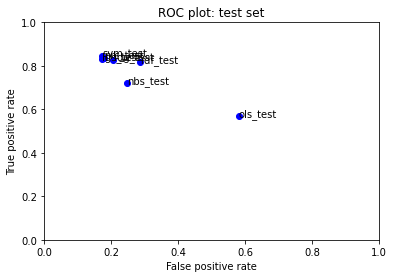

In [48]:
fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [49]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='/Users/maybaho/Documents/Parsons/Machine Learning/assignments/data/moviereviews_test.tsv', my_random_seed=13, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 2 columns 

the data types for each of the columns in movie_data:
id        object
review    object
dtype: object 

the first 10 rows in movie_data:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...
Shape of HashingVectorizer X:
(25000, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         131           5
1         169          15
2         176          18
3         112           5
4         133           8
5         331          20
6         121          18
7         230          22
8          59           3
9         224          14
Size

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [50]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = rdf.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.55812


In [51]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [52]:
my_submission.head()

,id,prediction
0,12311_10,1
1,8348_2,0
2,5828_4,0
3,7186_2,0
4,12128_7,1


In [53]:
my_submission.shape

(25000, 2)

In [54]:
# export submission file as pdf
# CHANGE FILE PATH: 
my_submission.to_csv('/Users/maybaho/Documents/Parsons/Machine Learning/assignments/data/moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation